### **Syntetic Cleaning**

**Name:** Jimenez Burriola Lesly Elizabeth


#### **Import Libraries**

In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math

#### **Read Dataset**

In [434]:
df = pd.read_csv("Synthetic_Data_Cleaning_example.csv")

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         103 non-null    float64
 1   Income      103 non-null    float64
 2   Gender      84 non-null     object 
 3   Registered  103 non-null    float64
 4   City        103 non-null    object 
dtypes: float64(3), object(2)
memory usage: 4.2+ KB


In [436]:
df.head()

,Age,Income,Gender,Registered,City
0,34.967142,28769.438869,Male,1.0,New York
1,28.617357,43690.320159,Female,0.0,Paris
2,36.476885,44859.282252,MALE,1.0,Tokyo
3,45.230299,37965.840962,FEMALE,0.0,Berlin
4,27.658466,47580.714325,male,1.0,New York


In [437]:
df.describe()

,Age,Income,Registered
count,103.000000,103.000000,103.000000
mean,29.573987,51079.867179,0.504854
std,13.137300,21167.304578,0.502421
min,-5.000000,-1000.000000,0.000000
25%,23.988273,37726.305475,0.000000
50%,28.843517,51028.444622,1.000000
75%,34.967142,58315.989946,1.000000
max,120.000000,200000.000000,1.000000


In [438]:
df.shape

(104, 5)

#### **Data Cleaning**

##### Check for missing values

In [439]:
df["Age"].isna().sum()

np.int64(1)

In [440]:
df["City"].isna().sum()

np.int64(1)

In [441]:
df["Gender"].isna().sum()

np.int64(20)

In [442]:
df["Income"].isna().sum()

np.int64(1)

In [443]:
df["Registered"].isna().sum()

np.int64(1)

##### Check for duplicate values

In [444]:
df.duplicated().sum()

np.int64(1)

#### Remove duplicates

In [445]:
df.drop_duplicates(inplace=True)

##### Convert missing numbers to NaN

In [446]:
df.loc[(df['Age'] < 18) | (df['Age'] > 95), 'Age'] = np.nan
df.loc[df['Income'] < 0, 'Income'] = np.nan

##### Delete rows with missing critical values

In [447]:
df.dropna(subset=['Age', 'Income', 'City', 'Registered'], inplace=True)

##### Standardize the "Gender" column and fill in missing values ​​with the most frequent value

In [448]:
df['Gender'] = df['Gender'].str.title()

In [449]:
df.isna().sum()

Age            0
Income         0
Gender        16
Registered     0
City           0
dtype: int64

In [450]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

C:\Users\Jmnzb\AppData\Local\Temp\ipykernel_18060\3657246551.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [451]:
df.isna().sum()

Age           0
Income        0
Gender        0
Registered    0
City          0
dtype: int64

##### Evaluate the histogram to see what else we can clean

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Registered'}>, <Axes: >]], dtype=object)

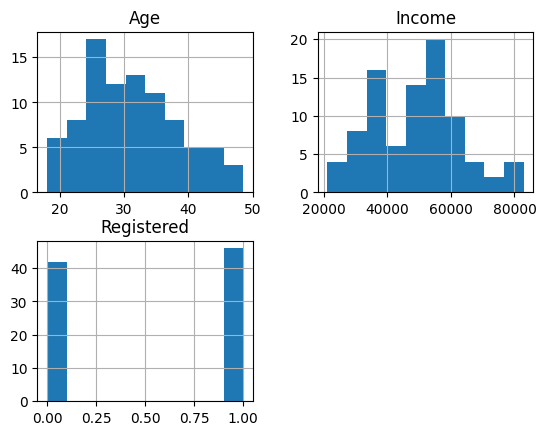

In [452]:
df.hist()

##### Change age and records to integers

In [453]:
df['Age'] = df['Age'].astype(int)
df['Registered'] = df['Registered'].astype(int)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Registered'}>, <Axes: >]], dtype=object)

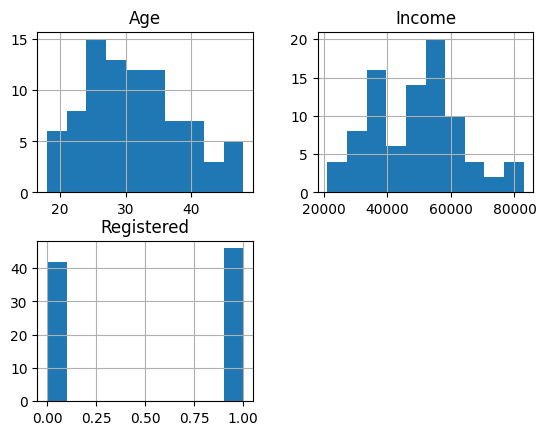

In [454]:
df.hist()

##### We evaluate what else we can do with the data

In [455]:
df.head()

,Age,Income,Gender,Registered,City
0,34,28769.438869,Male,1,New York
1,28,43690.320159,Female,0,Paris
2,36,44859.282252,Male,1,Tokyo
3,45,37965.840962,Female,0,Berlin
4,27,47580.714325,Male,1,New York


In [456]:
df["Gender"].value_counts()

Gender
Male      43
Female    26
Femle     10
Femael     9
Name: count, dtype: int64

##### We replaced misspelled gender values

In [ ]:
df["Gender"].replace({"Femael":"Female", "Femle":"Female"}, inplace=True)
df["Gender"].value_counts()

C:\Users\Jmnzb\AppData\Local\Temp\ipykernel_18060\3767401970.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace({"Femael":"Female", "Femle":"Female"}, inplace=True)


Gender
Female    45
Male      43
Name: count, dtype: int64

##### We put only two decimal places in income

In [458]:
df['Income'] = df['Income'].round(2)
df["Income"].value_counts()

Income
28769.44    1
43690.32    1
44859.28    1
37965.84    1
47580.71    1
           ..
52597.71    1
36742.14    1
52305.88    1
50873.13    1
32855.45    1
Name: count, Length: 88, dtype: int64

#### **Exploratory Data Analysis**

##### We make a demographic profile of the ages

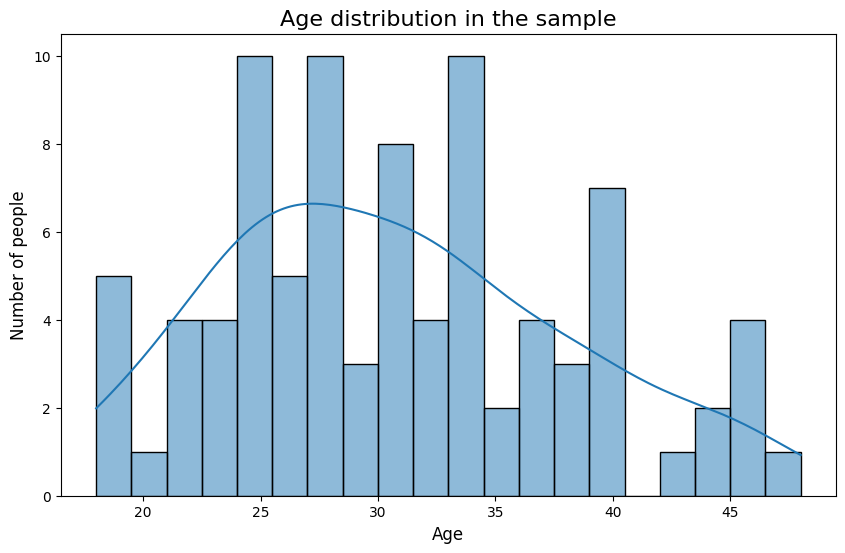

In [459]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age distribution in the sample', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of people', fontsize=12)
plt.show()

##### Income distribution

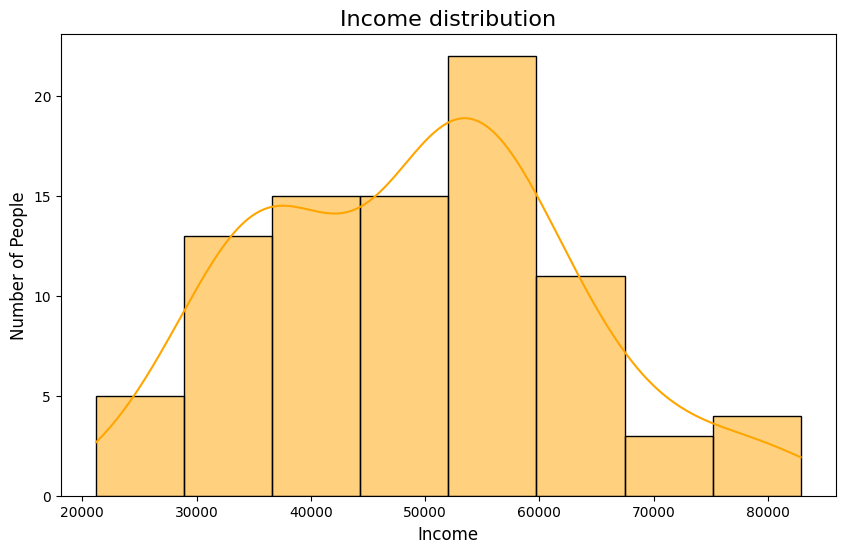

In [460]:
# Distribucion de ingresos
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True, color='orange')
plt.title('Income distribution', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.show()

##### Gender ratio

C:\Users\Jmnzb\AppData\Local\Temp\ipykernel_18060\1475849269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='plasma')


Text(0, 0.5, 'Total Number of People')

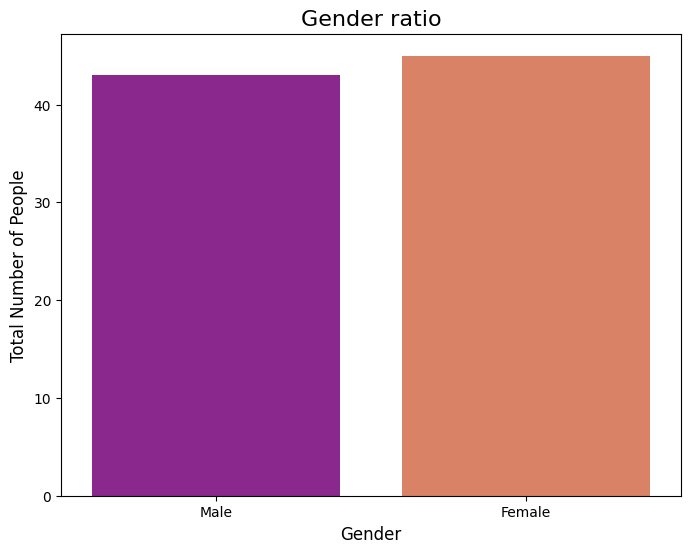

In [461]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='plasma')
plt.title('Gender ratio', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Number of People', fontsize=12)

##### Geographic distribution

C:\Users\Jmnzb\AppData\Local\Temp\ipykernel_18060\654983785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='City', data=df, order = df['City'].value_counts().index, palette='magma')


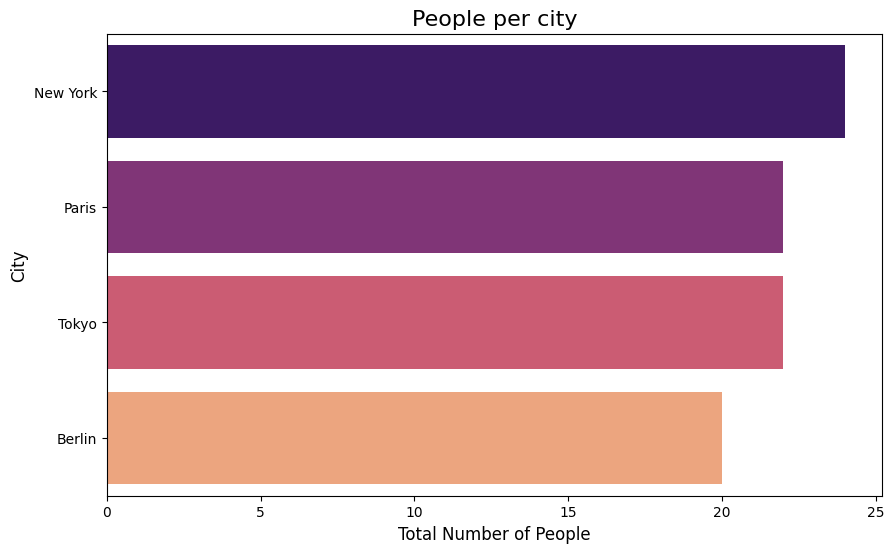

In [462]:
plt.figure(figsize=(10, 6))
sns.countplot(y='City', data=df, order = df['City'].value_counts().index, palette='magma')
plt.title('People per city', fontsize=16)
plt.xlabel('Total Number of People', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

##### Rate of registered persons

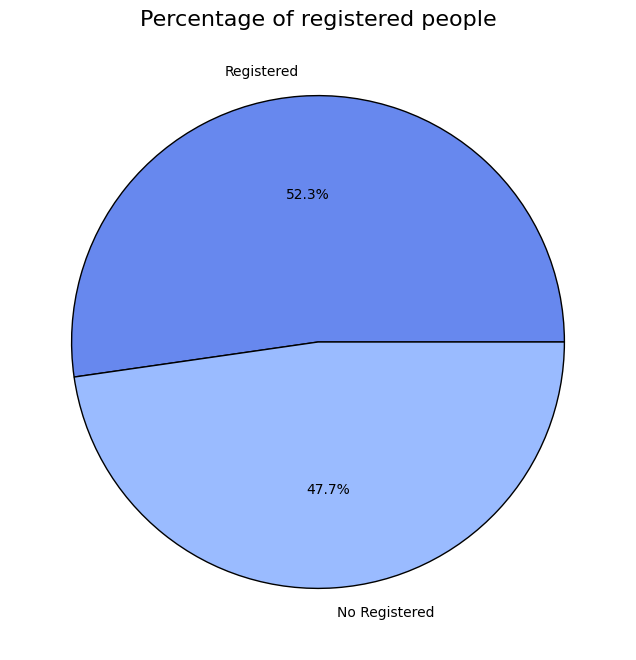

In [463]:
plt.figure(figsize=(8, 8))
df['Registered'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                     labels=['Registered', 'No Registered'],
                                     colors=sns.color_palette('coolwarm'),
                                     wedgeprops={'edgecolor':'black'})
plt.title('Percentage of registered people', fontsize=16)
plt.ylabel('')
plt.show()

##### Age-income ratio

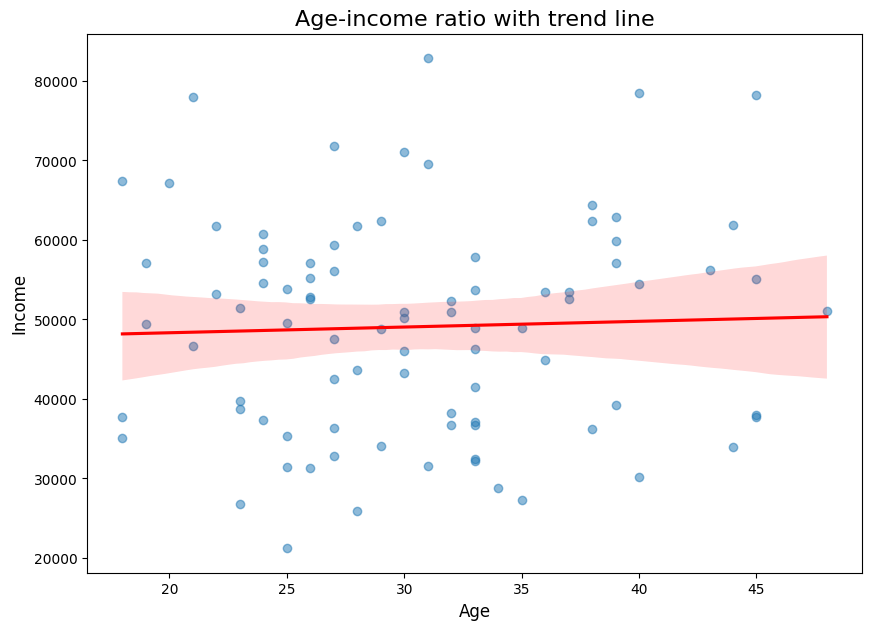

In [464]:
plt.figure(figsize=(10, 7))
sns.regplot(x='Age', y='Income', data=df, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Age-income ratio with trend line', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.show()

##### Gender income gap

C:\Users\Jmnzb\AppData\Local\Temp\ipykernel_18060\524210284.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Income', data=df, palette='plasma', inner='quartile')


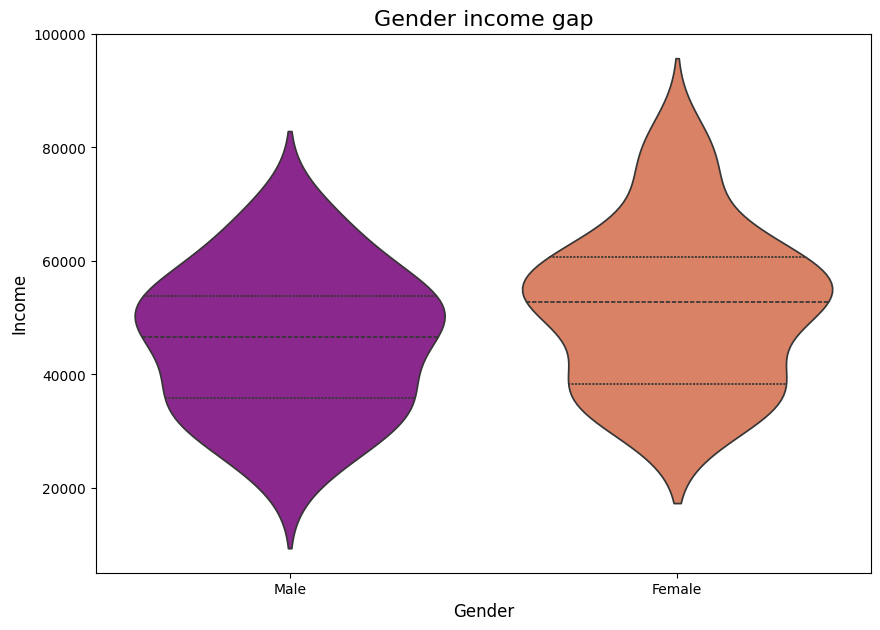

In [465]:
# brecha de ingresos por genero
plt.figure(figsize=(10, 7))
sns.violinplot(x='Gender', y='Income', data=df, palette='plasma', inner='quartile')
plt.title('Gender income gap', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.show()

##### Income by city

C:\Users\Jmnzb\AppData\Local\Temp\ipykernel_18060\3917817891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='Income', data=df, palette='magma')


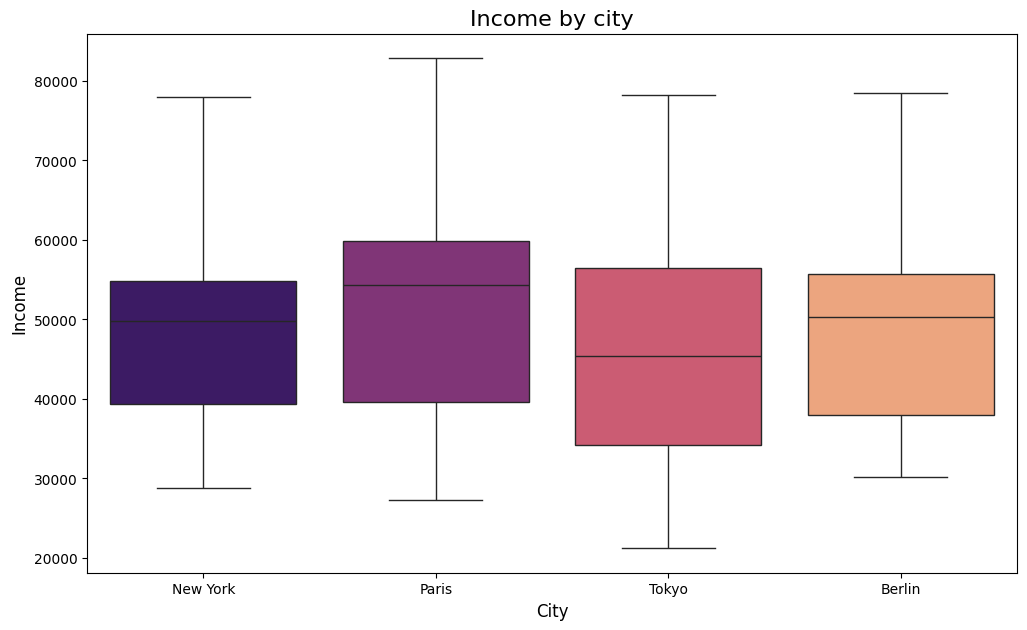

In [466]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='City', y='Income', data=df, palette='magma')
plt.title('Income by city', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.show()

##### Registration behavior by gender

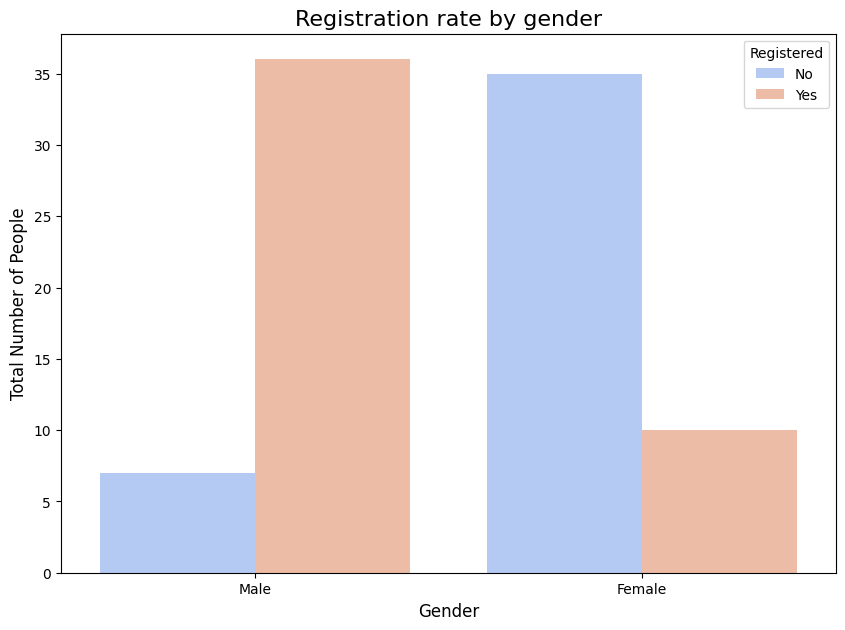

In [467]:
# comportamiento de registros por genero
plt.figure(figsize=(10, 7))
sns.countplot(x='Gender', hue='Registered', data=df, palette='coolwarm')
plt.title('Registration rate by gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Number of People', fontsize=12)
plt.legend(title='Registered', labels=['No', 'Yes'])
plt.show()

##### Interaction between age-gender-income

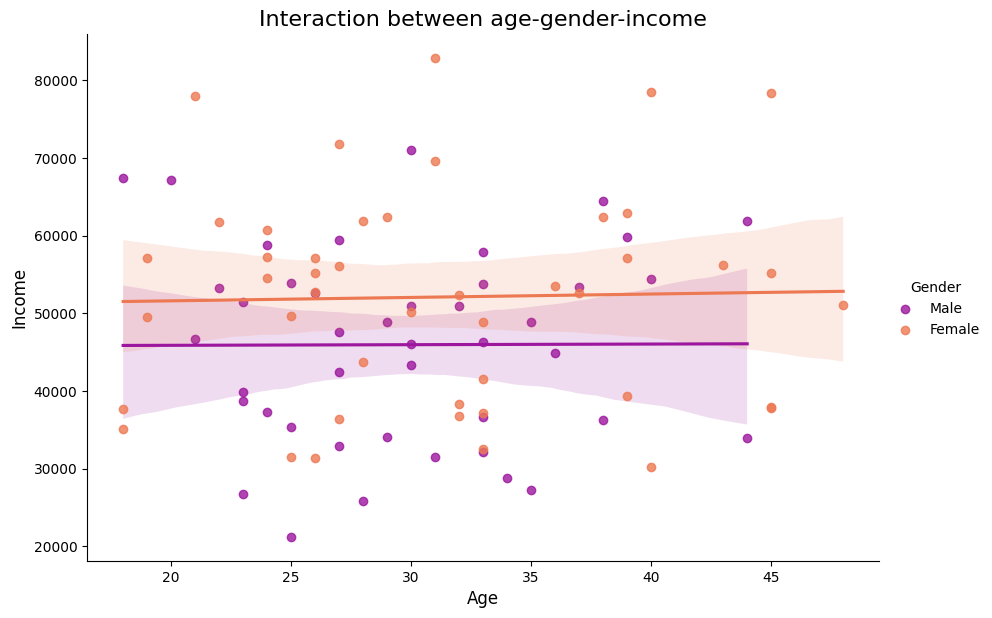

In [468]:
sns.lmplot(x='Age', y='Income', hue='Gender', data=df, height=6, aspect=1.5, palette='plasma')
plt.title('Interaction between age-gender-income', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.show()

##### Profile of users with the highest income in the top 20%

C:\Users\Jmnzb\AppData\Local\Temp\ipykernel_18060\662152947.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df_high_income, ax=axes[0], palette='plasma')
C:\Users\Jmnzb\AppData\Local\Temp\ipykernel_18060\662152947.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df_high_income, ax=axes[1], palette='magma')
C:\Users\Jmnzb\AppData\Local\Temp\ipykernel_18060\662152947.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='City', data=df_high_income, ax=axes[2], palette='viridis')


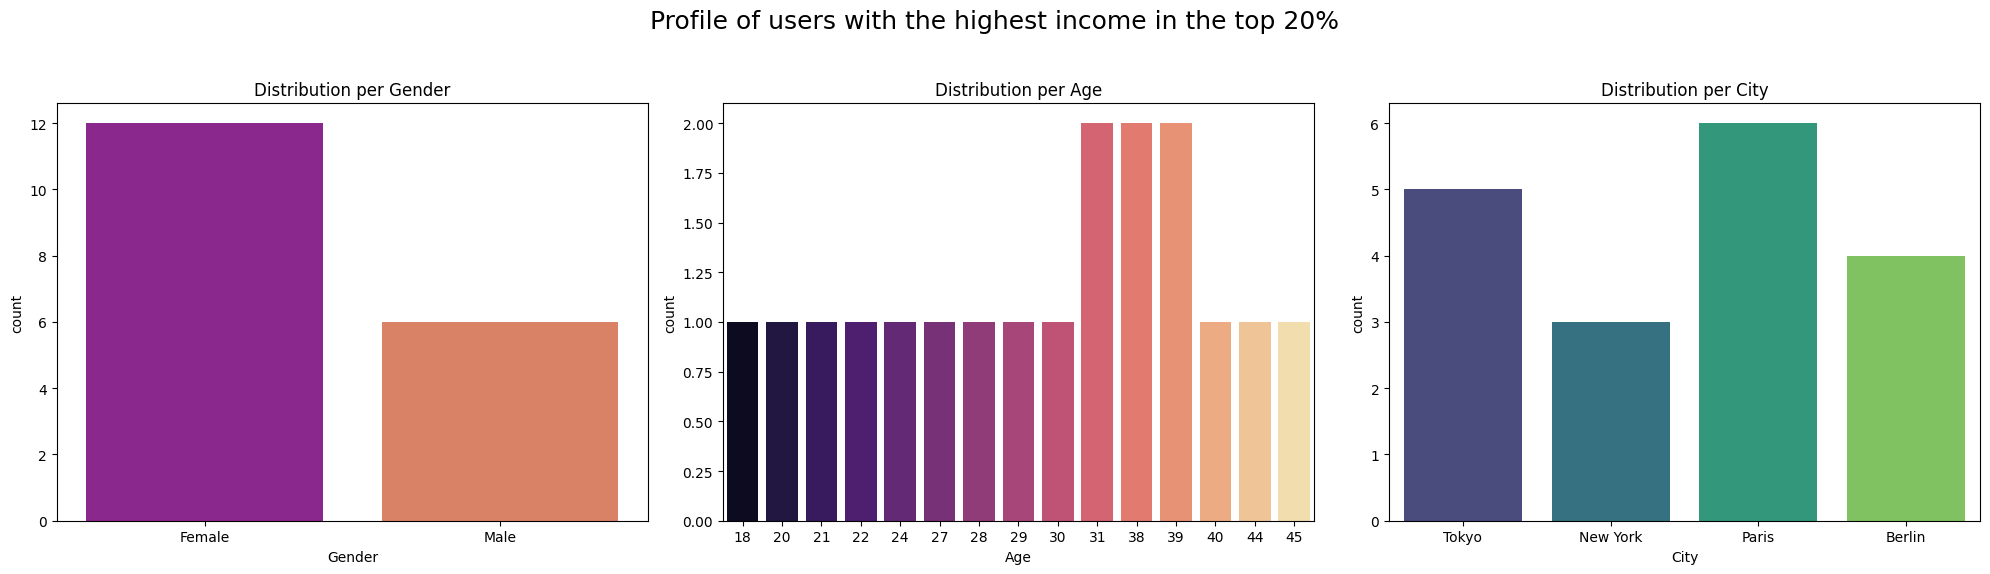

In [469]:
high_income_threshold = df['Income'].quantile(0.80)
df_high_income = df[df['Income'] >= high_income_threshold]


fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Profile of users with the highest income in the top 20%', fontsize=18)

sns.countplot(x='Gender', data=df_high_income, ax=axes[0], palette='plasma')
axes[0].set_title('Distribution per Gender')

sns.countplot(x='Age', data=df_high_income, ax=axes[1], palette='magma')
axes[1].set_title('Distribution per Age')

sns.countplot(x='City', data=df_high_income, ax=axes[2], palette='viridis')
axes[2].set_title('Distribution per City')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### Profile of unregistered users

C:\Users\Jmnzb\AppData\Local\Temp\ipykernel_18060\3219359256.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df_not_registered, ax=axes[1], palette='magma')
C:\Users\Jmnzb\AppData\Local\Temp\ipykernel_18060\3219359256.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='City', data=df_not_registered, ax=axes[2], palette='viridis')


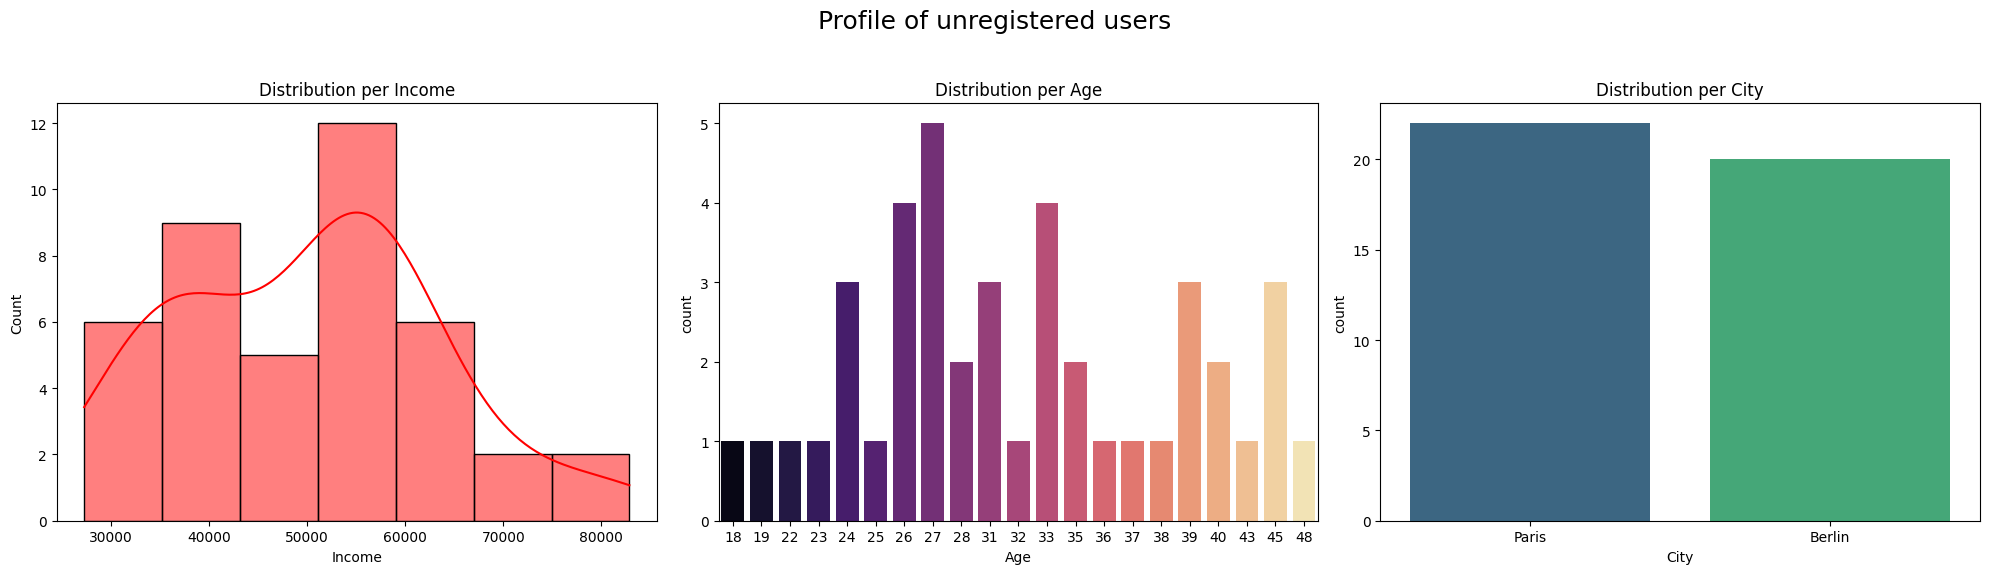

In [470]:
df_not_registered = df[df['Registered'] == 0]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Profile of unregistered users', fontsize=18)

sns.histplot(df_not_registered['Income'], kde=True, ax=axes[0], color='red')
axes[0].set_title('Distribution per Income')

sns.countplot(x='Age', data=df_not_registered, ax=axes[1], palette='magma')
axes[1].set_title('Distribution per Age')

sns.countplot(x='City', data=df_not_registered, ax=axes[2], palette='viridis')
axes[2].set_title('Distribution per City')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### **Feature Engineering**


##### Changing gender to integer values, 0 for women, 1 for men

In [ ]:
df.loc[df["Gender"] == "Female", "Gender"] = 0
df.loc[df["Gender"] == "Male", "Gender"] = 1
df["Gender"].value_counts()

Gender
0    45
1    43
Name: count, dtype: int64

##### Changing city values ​​to integer values

In [ ]:
df.loc[df["City"] == "New York", "City"] = 0
df.loc[df["City"] == "Paris", "City"] = 1
df.loc[df["City"] == "Tokyo", "City"] = 2
df.loc[df["City"] == "Berlin", "City"] = 3
df["City"].value_counts()

City
0    24
1    22
2    22
3    20
Name: count, dtype: int64

In [473]:
df.head()

,Age,Income,Gender,Registered,City
0,34,28769.44,1,1,0
1,28,43690.32,0,0,1
2,36,44859.28,1,1,2
3,45,37965.84,0,0,3
4,27,47580.71,1,1,0


### **Database original**

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Registered'}>, <Axes: >]], dtype=object)

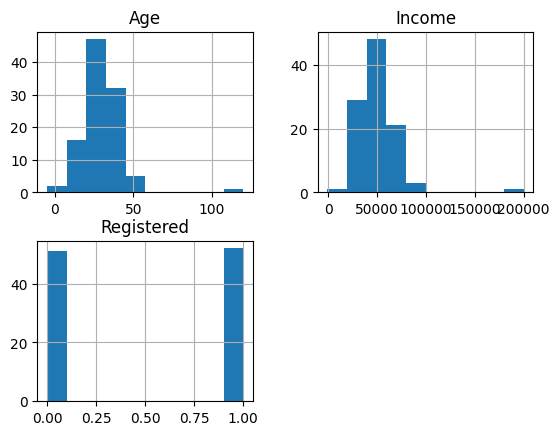

In [ ]:
df_origin = pd.read_csv("Synthetic_Data_Cleaning_example.csv")
df_origin.hist()

### **Database after Data Cleaning and changes**

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Registered'}>, <Axes: >]], dtype=object)

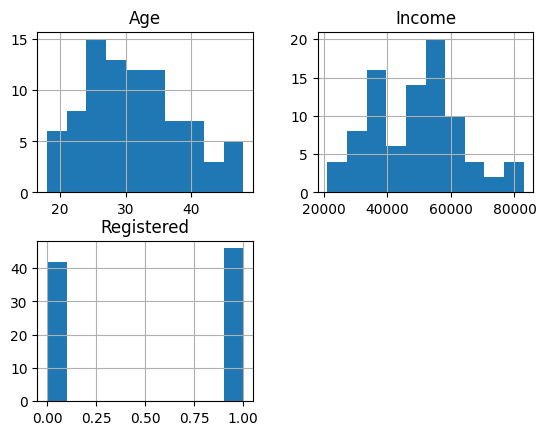

In [ ]:
df.hist()